In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv("/content/drive/MyDrive/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:

print("Initial Shape of Dataset:", df.shape)

Initial Shape of Dataset: (1143, 13)


In [4]:


# Drop the 'Id' column if it exists
df.drop(columns=['Id'], inplace=True, errors='ignore')


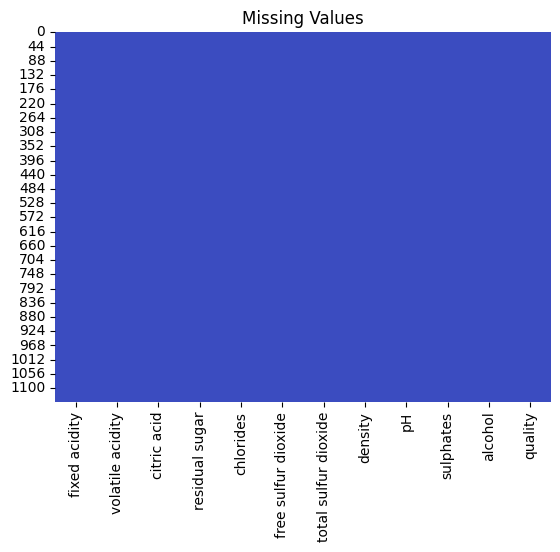

In [5]:
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values')
plt.show()

In [6]:

# Define a function to detect and remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


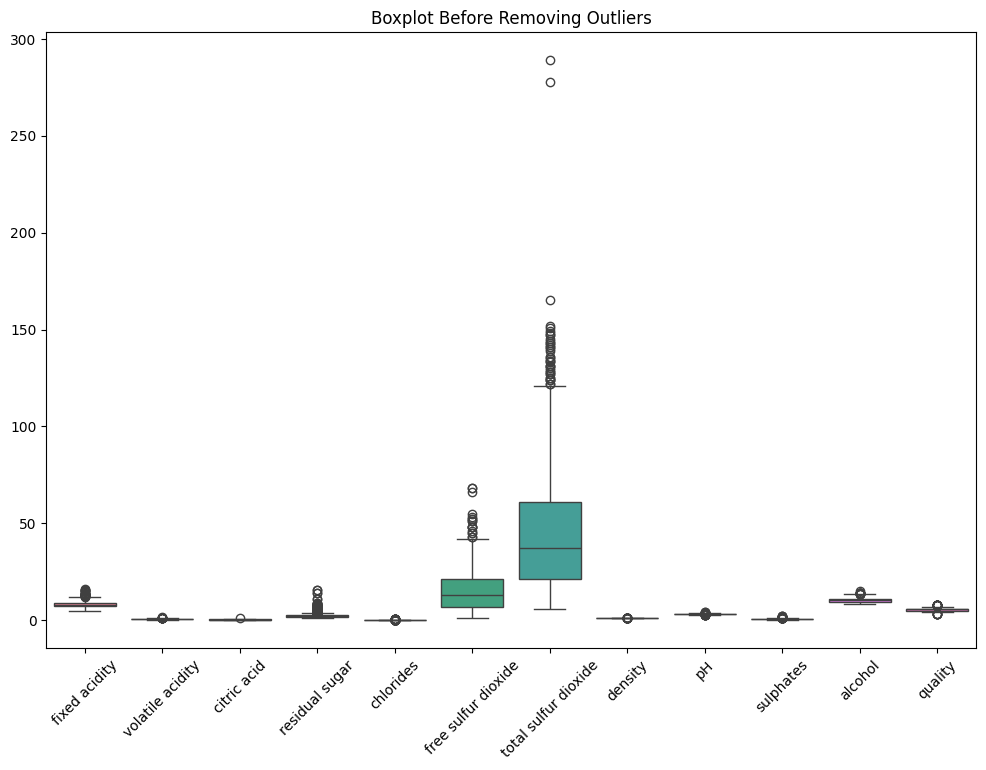

In [7]:
# Visualize boxplots before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot Before Removing Outliers")
plt.xticks(rotation=45)
plt.show()



In [8]:
# Iteratively remove outliers from all numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
previous_row_count = 0

while previous_row_count != len(df):
    previous_row_count = len(df)
    for col in numeric_columns:
        df = remove_outliers_iqr(df, col)

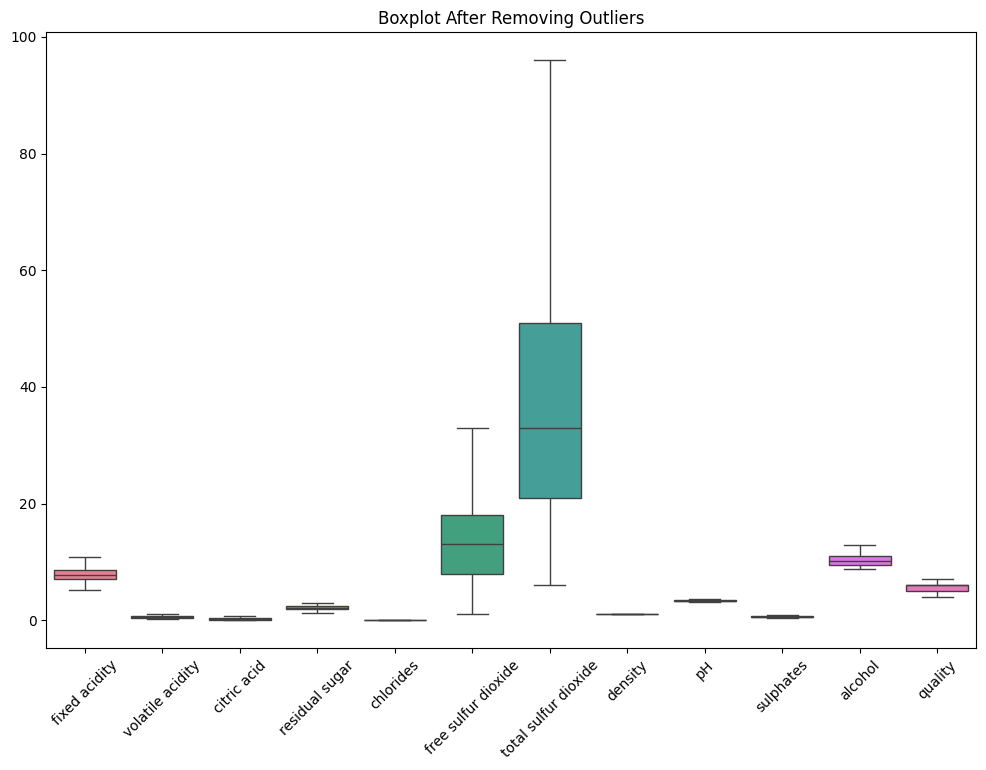

In [9]:
# Visualize boxplots after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=45)
plt.show()




In [10]:
# Print dataset information after cleaning
print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (629, 12)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [13]:


# Separate features and target
X = df.drop('quality', axis=1)  # Features (all except 'quality')
y = df['quality']  # Target ('quality')

In [14]:

y

,quality
0,5
1,5
2,5
4,5
5,5
...,...
1136,6
1138,6
1139,6
1140,5


In [15]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5


In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [23]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

In [24]:
# Split the balanced and scaled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)


In [35]:
print("Logistic Regression Results:")
logreg = LogisticRegression(max_iter=100000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)



Logistic Regression Results:


In [36]:
# Logistic Regression Evaluation
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           4       0.63      0.68      0.66        57
           5       0.51      0.41      0.46        56
           6       0.42      0.42      0.42        57
           7       0.71      0.79      0.75        56

    accuracy                           0.58       226
   macro avg       0.57      0.58      0.57       226
weighted avg       0.57      0.58      0.57       226

Accuracy (Logistic Regression): 0.5752212389380531


In [37]:
print("\nRandom Forest Results:")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)





Random Forest Results:


In [38]:
# Random Forest Evaluation
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           4       0.95      1.00      0.97        57
           5       0.69      0.73      0.71        56
           6       0.64      0.47      0.55        57
           7       0.80      0.93      0.86        56

    accuracy                           0.78       226
   macro avg       0.77      0.78      0.77       226
weighted avg       0.77      0.78      0.77       226

Accuracy (Random Forest): 0.7831858407079646


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,count
quality,
5,483
6,483
7,483
4,483
8,483
3,483


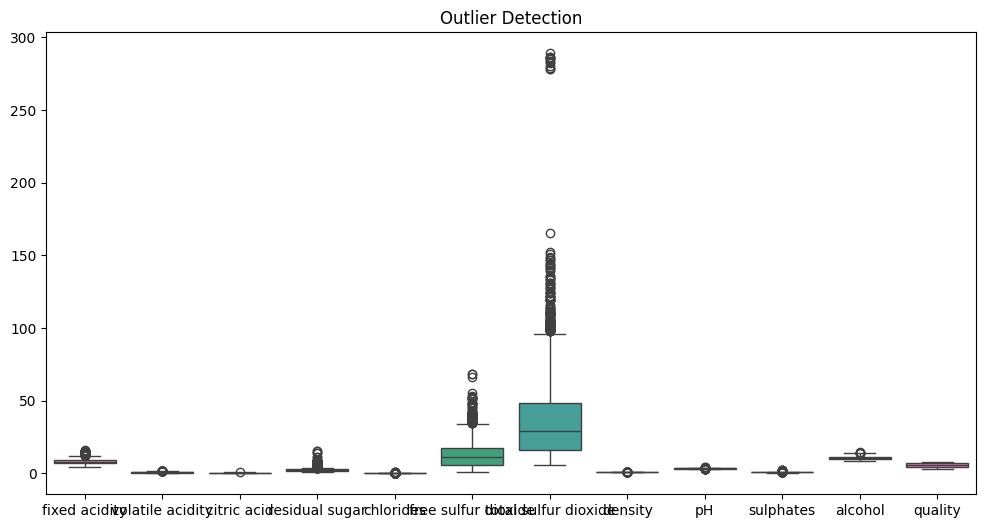

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

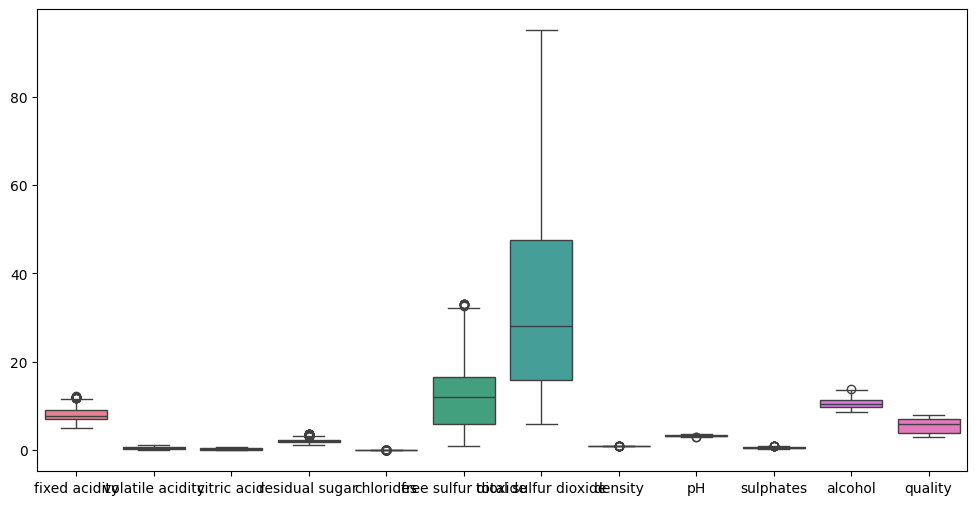

In [ ]:
df = Outlier_r(n_col,df)

plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

In [ ]:
def percent(cols , df):

    for col in cols:

        lowerbound = df[col].quantile(0.01)

        upperbound = df[col].quantile(0.99)



        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]

    return df

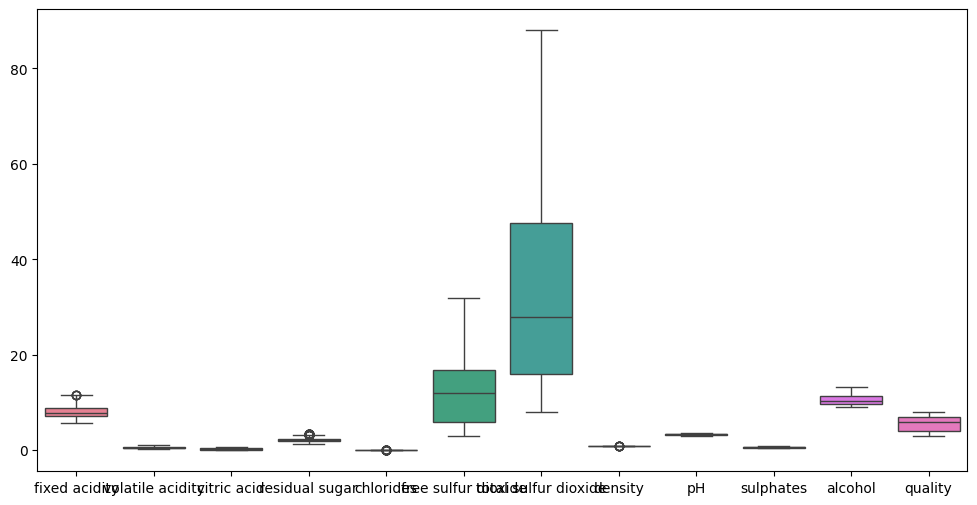

In [ ]:
df = percent(n_col,df)
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()